4 out of the 16 rectangles selected


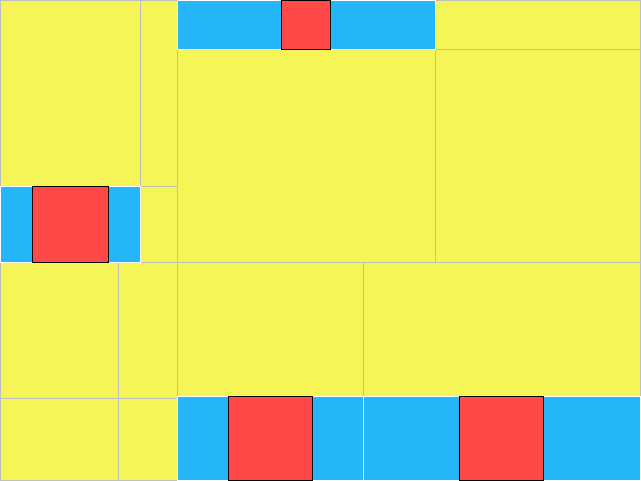

In [229]:
import random
from random import randint
random.seed()
%matplotlib inline

class Point(object):
    def __init__(self, x, y):
        self.x, self.y = x, y

    @staticmethod
    def from_point(other):
        return Point(other.x, other.y)

class Rect(object):
    def __init__(self, x1, y1, x2, y2):
        minx, maxx = (x1,x2) if x1 < x2 else (x2,x1)
        miny, maxy = (y1,y2) if y1 < y2 else (y2,y1)
        self.min, self.max = Point(minx, miny), Point(maxx, maxy)

    @staticmethod
    def from_points(p1, p2):
        return Rect(p1.x, p1.y, p2.x, p2.y)

    width  = property(lambda self: self.max.x - self.min.x)
    height = property(lambda self: self.max.y - self.min.y)

plus_or_minus = lambda v: v * [-1, 1][(randint(0, 100) % 2)]  # equal chance +/-1

def quadsect(rect, factor):
    """ Subdivide given rectangle into four non-overlapping rectangles.
        'factor' is an integer representing the proportion of the width or
        height the deviatation from the center of the rectangle allowed.
    """
    # pick a point in the interior of given rectangle
    w, h = rect.width, rect.height  # cache properties
    center = Point(rect.min.x + (w // 2), rect.min.y + (h // 2))
    delta_x = plus_or_minus(randint(0, w // factor))
    delta_y = plus_or_minus(randint(0, h // factor))
    interior = Point(center.x + delta_x, center.y + delta_y)

    # create rectangles from the interior point and the corners of the outer one
    return [Rect(interior.x, interior.y, rect.min.x, rect.min.y),
            Rect(interior.x, interior.y, rect.max.x, rect.min.y),
            Rect(interior.x, interior.y, rect.max.x, rect.max.y),
            Rect(interior.x, interior.y, rect.min.x, rect.max.y)]

def square_subregion(rect):
    """ Return a square rectangle centered within the given rectangle """
    w, h = rect.width, rect.height  # cache properties
    if w < h:
        offset = (h - w) // 2
        return Rect(rect.min.x, rect.min.y+offset,
                    rect.max.x, rect.min.y+offset+w)
    else:
        offset = (w - h) // 2
        return Rect(rect.min.x+offset, rect.min.y,
                    rect.min.x+offset+h, rect.max.y)

NUM_RECTS = 4
REGION = Rect(0, 0, 640, 480)


# call quadsect() until at least the number of rects wanted has been generated
rects = [REGION]   # seed output list
while len(rects) <= NUM_RECTS:
    rects = [subrect for rect in rects
                        for subrect in quadsect(rect, 3)]

# random.shuffle(rects)  # mix them up
sample = random.sample(rects, NUM_RECTS)  # select the desired number
print ('%d out of the %d rectangles selected' % (NUM_RECTS, len(rects)))

#################################################
# extra credit - create an image file showing results

from PIL import Image, ImageDraw

def gray(v): return tuple(int(v*255) for _ in range(3))

BLACK, DARK_GRAY, GRAY = gray(0), gray(.25), gray(.5)
LIGHT_GRAY, WHITE = gray(.75), gray(1)
RED, GREEN, BLUE = (255, 0, 0), (0, 255, 0), (0, 0, 255)
CYAN, MAGENTA, YELLOW = (0, 255, 255), (255, 0, 255), (255, 255, 0)
BACKGR, SQUARE_COLOR, RECT_COLOR = (245, 245, 87), (255, 73, 73), (37, 182, 249)

imgx, imgy = REGION.max.x + 1, REGION.max.y + 1
image = Image.new("RGB", (imgx, imgy), BACKGR)  # create color image
draw = ImageDraw.Draw(image)

def draw_rect(rect, fill=None, outline=WHITE):
    draw.rectangle([(rect.min.x, rect.min.y), (rect.max.x, rect.max.y)],
                   fill=fill, outline=outline)
# first draw outlines of all the non-overlapping rectanges generated
for rect in rects:
    draw_rect(rect, outline=LIGHT_GRAY)

# then draw the random sample of them selected
for rect in sample:
    draw_rect(rect, fill=RECT_COLOR, outline=WHITE)

# and lastly convert those into squares and re-draw them in another color
for rect in sample:
    draw_rect(square_subregion(rect), fill=SQUARE_COLOR, outline=BLACK)

display(image)

# filename = 'square_quadsections.png'
# image.show(filename)
# print (repr(filename), 'output image saved')